**Applied Data Science Capstone Project**

In [92]:
# Data
import pandas as pd
import numpy as np

# Plots
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

**Import Libraries**

In [93]:
# Import data
df = pd.read_csv("Data-Collisions.csv")
df = df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'ADDRTYPE', 'SEVERITYCODE']]
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,ADDRTYPE,SEVERITYCODE
0,Overcast,Wet,Daylight,N,Intersection,2
1,Raining,Wet,Dark - Street Lights On,0,Block,1
2,Overcast,Dry,Daylight,0,Block,1
3,Clear,Dry,Daylight,N,Block,1
4,Raining,Wet,Daylight,0,Intersection,2


**Data cleaning**

In [106]:
df.dtypes

WEATHER          int8
ROADCOND         int8
LIGHTCOND        int8
UNDERINFL        int8
ADDRTYPE         int8
SEVERITYCODE    int64
dtype: object

In [95]:
# Replace NaN data
df["WEATHER"].replace(np.nan, df["WEATHER"].mode().iloc[0], inplace=True)
df["ROADCOND"].replace(np.nan, df["ROADCOND"].mode().iloc[0], inplace=True)
df["LIGHTCOND"].replace(np.nan, df["LIGHTCOND"].mode().iloc[0], inplace=True)
df["UNDERINFL"].replace(np.nan, df["UNDERINFL"].mode().iloc[0], inplace=True)
df["ADDRTYPE"].replace(np.nan, df["ADDRTYPE"].mode().iloc[0], inplace=True)

**Data visualization**

In [96]:
#Group by WEATHER
df_wh = df.groupby(by=['WEATHER'])['WEATHER'].count().to_frame()
df_wh.columns = ['COUNT']
df_wh = df_wh.sort_values('COUNT', ascending=False)
print (df_wh)

#Group by ROADCOND
df_rc = df.groupby(by=['ROADCOND'])['ROADCOND'].count().to_frame()
df_rc.columns = ['COUNT']
df_rc = df_rc.sort_values('COUNT', ascending=False)
print (df_rc)

#Group by LIGHTCOND
df_lc = df.groupby(by=['LIGHTCOND'])['LIGHTCOND'].count().to_frame()
df_lc.columns = ['COUNT']
df_lc = df_lc.sort_values('COUNT', ascending=False)
print (df_lc)

#Group by UNDERINFL
df_ui = df.groupby(by=['UNDERINFL'])['UNDERINFL'].count().to_frame()
df_ui.columns = ['COUNT']
df_ui = df_ui.sort_values('COUNT', ascending=False)
print (df_ui)

#Group by ADDRTYPE
df_at = df.groupby(by=['ADDRTYPE'])['ADDRTYPE'].count().to_frame()
df_at.columns = ['COUNT']
df_at = df_at.sort_values('COUNT', ascending=False)
print (df_at)

#Group by SEVERITYCODE
df_st = df.groupby(by=['SEVERITYCODE'])['SEVERITYCODE'].count().to_frame()
df_st.columns = ['COUNT']
df_st = df_st.sort_values('COUNT', ascending=False)
print (df_st)


                           COUNT
WEATHER                         
Clear                     116216
Raining                    33145
Overcast                   27714
Unknown                    15091
Snowing                      907
Other                        832
Fog/Smog/Smoke               569
Sleet/Hail/Freezing Rain     113
Blowing Sand/Dirt             56
Severe Crosswind              25
Partly Cloudy                  5
                 COUNT
ROADCOND              
Dry             129522
Wet              47474
Unknown          15078
Ice               1209
Snow/Slush        1004
Other              132
Standing Water     115
Sand/Mud/Dirt       75
Oil                 64
                           COUNT
LIGHTCOND                       
Daylight                  121307
Dark - Street Lights On    48507
Unknown                    13473
Dusk                        5902
Dawn                        2502
Dark - No Street Lights     1537
Dark - Street Lights Off    1199
Other                

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


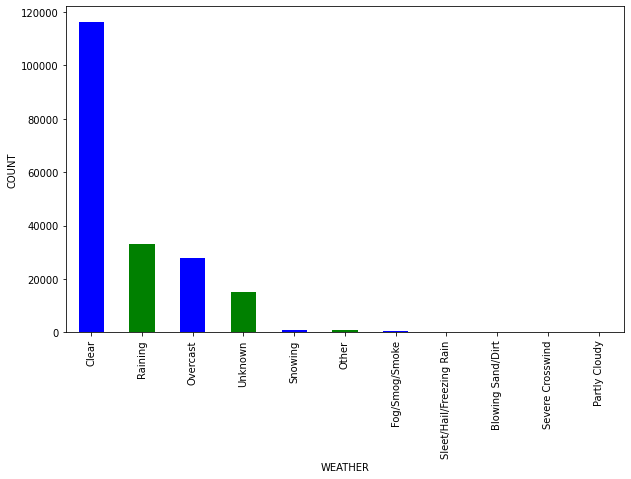

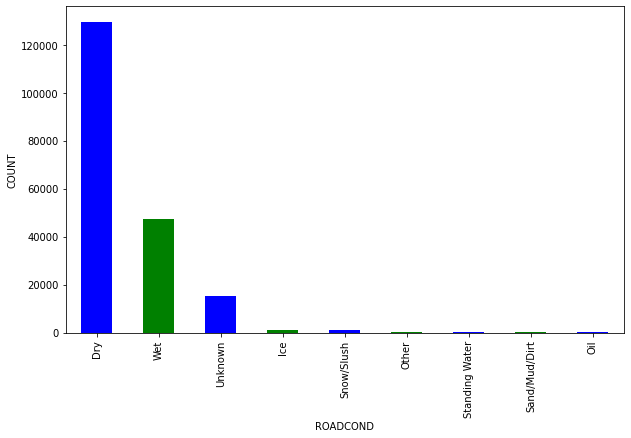

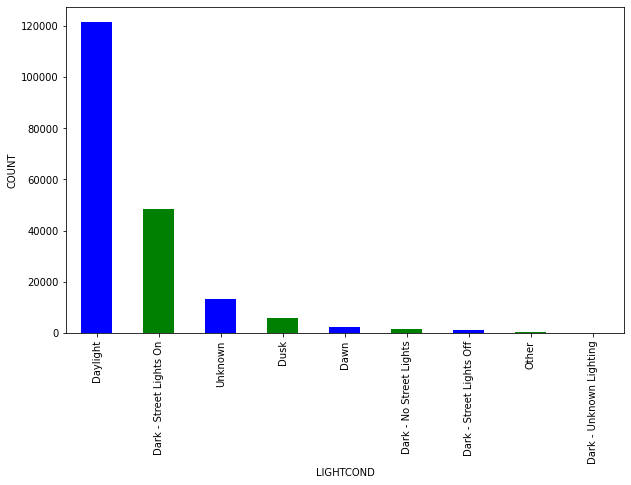

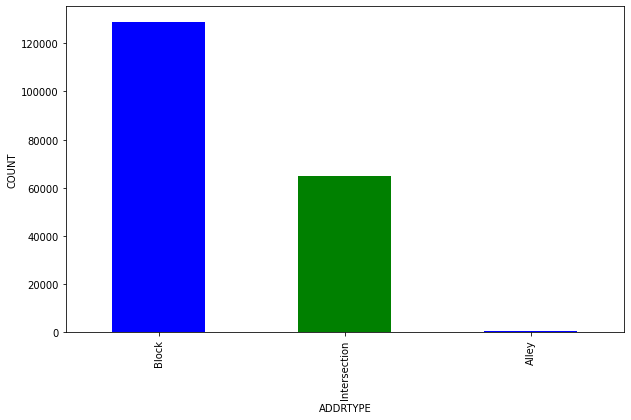

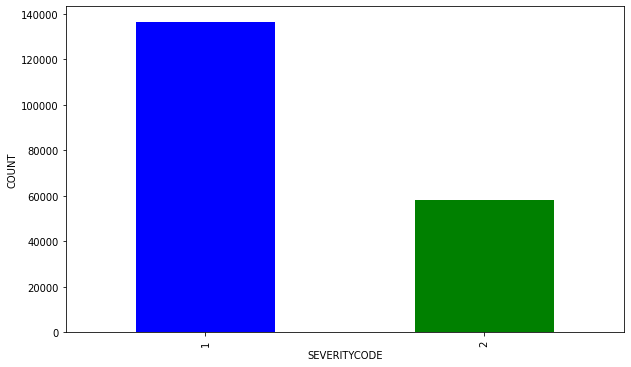

In [97]:
#Plot severitycode
df_wh.plot(kind='bar', figsize=(10, 6), legend=None, color='bg')
plt.xlabel('WEATHER') # add to x-label to the plot
plt.ylabel('COUNT') # add y-label to the plot
plt.show()

#Plot severitycode
df_rc.plot(kind='bar', figsize=(10, 6), legend=None, color='bg')
plt.xlabel('ROADCOND') # add to x-label to the plot
plt.ylabel('COUNT') # add y-label to the plot
plt.show()

#Plot severitycode
df_lc.plot(kind='bar', figsize=(10, 6), legend=None, color='bg')
plt.xlabel('LIGHTCOND') # add to x-label to the plot
plt.ylabel('COUNT') # add y-label to the plot
plt.show()

#Plot severitycode
df_at.plot(kind='bar', figsize=(10, 6), legend=None, color='bg')
plt.xlabel('ADDRTYPE') # add to x-label to the plot
plt.ylabel('COUNT') # add y-label to the plot
plt.show()

#Plot severitycode
df_st.plot(kind='bar', figsize=(10, 6), legend=None, color='bg')
plt.xlabel('SEVERITYCODE') # add to x-label to the plot
plt.ylabel('COUNT') # add y-label to the plot
plt.show()

**Data pre-processing and selection**

In [98]:
# Encode categorical variables
df['WEATHER']=df['WEATHER'].astype('category').cat.codes
df['ROADCOND']=df['ROADCOND'].astype('category').cat.codes
df['LIGHTCOND']=df['LIGHTCOND'].astype('category').cat.codes
df['UNDERINFL']=df['UNDERINFL'].astype('category').cat.codes
df['ADDRTYPE']=df['ADDRTYPE'].astype('category').cat.codes
df

,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,ADDRTYPE,SEVERITYCODE
0,4,8,5,2,2,2
1,6,8,2,0,1,1
2,4,0,5,0,1,1
3,1,0,5,2,1,1
4,6,8,5,0,2,2
...,...,...,...,...,...,...
194668,1,0,5,2,1,2
194669,6,8,5,2,1,1
194670,1,0,5,2,2,2
194671,1,0,6,2,2,2


In [99]:
df.dtypes

WEATHER          int8
ROADCOND         int8
LIGHTCOND        int8
UNDERINFL        int8
ADDRTYPE         int8
SEVERITYCODE    int64
dtype: object

In [100]:
# Separate parameters
X = np.asarray(df[['WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'ADDRTYPE']])
y = np.asarray(df['SEVERITYCODE'])
print (X[0:5])
print (y [0:5])

[[4 8 5 2 2]
 [6 8 2 0 1]
 [4 0 5 0 1]
 [1 0 5 2 1]
 [6 8 5 0 2]]
[2 1 1 1 2]


In [101]:
# Data normalization
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.34206956,  1.50722693,  0.34496947,  0.80962405,  1.39942178],
       [ 1.04697121,  1.50722693, -1.42641774, -1.16475782, -0.69049979],
       [ 0.34206956, -0.69828325,  0.34496947, -1.16475782, -0.69049979],
       [-0.71528292, -0.69828325,  0.34496947,  0.80962405, -0.69049979],
       [ 1.04697121,  1.50722693,  0.34496947, -1.16475782,  1.39942178]])

In [102]:
# Train and Test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (146004, 5) (146004,)
Test set: (48669, 5) (48669,)


**Logistic Regression Model**

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.1, solver='lbfgs', max_iter=200).fit(X_train,y_train)
LR

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

**Validation**

In [105]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

val_jac = jaccard_similarity_score(y_test, yhat)
val_log = log_loss(y_test, yhat_prob)

print ("Jaccard Similarity:", val_jac)
print ("Log Loss:", val_log)

Jaccard Similarity: 0.6979596868643284
Log Loss: 0.585714398873718


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
